In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/623.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/764.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1075.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/771.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/208.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/820.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/473.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1031.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/333.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1024.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/537.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/45.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/369.jpg
/kaggle/in

# Loading Dataset

In [45]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import io

dataset_dir = '/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image'  

classes = ['Normal', 'Lung_Opacity', 'Viral Pneumonia']

def load_image_paths_and_labels(dataset_dir, classes):
    image_paths = []
    labels = []
    
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):  
                image_paths.append(os.path.join(class_dir, filename))
                labels.append(class_name)
    
    return pd.DataFrame({'filepaths': image_paths, 'labels': labels})


# Train Test Split

In [46]:
df = load_image_paths_and_labels(dataset_dir, classes)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['labels'])

# Print shapes of the splits
print(f"Training set: {train_df.shape}")
print(f"Validation set: {val_df.shape}")
print(f"Test set: {test_df.shape}")

Training set: (2224, 2)
Validation set: (556, 2)
Test set: (695, 2)


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_gen = ImageDataGenerator(rescale=1./255)


train = image_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepaths",
    y_col="labels",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="categorical",  
    batch_size=32,
    shuffle=False  
)


val = image_gen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepaths",
    y_col="labels",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False  
)


test = image_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepaths",
    y_col="labels",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False  
)




Found 2224 validated image filenames belonging to 3 classes.
Found 556 validated image filenames belonging to 3 classes.
Found 695 validated image filenames belonging to 3 classes.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adamax

# Training the Model

In [38]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
learning_rate = 0.001
base_model = InceptionV3(weights='imagenet', include_top=False,pooling='max')
x = base_model.output
x = Dense(256, activation='relu',)(x)
x = Dropout(0.4)(x) 
predictions = Dense(3, activation='softmax')(x) 
model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adamax(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, epochs=25, validation_data=val)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 100s 630ms/step - accuracy: 0.5864 - loss: 1.4294 - val_accuracy: 0.6205 - val_loss: 7.1159
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - accuracy: 0.8798 - loss: 0.3827 - val_accuracy: 0.8831 - val_loss: 0.3429
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.9329 - loss: 0.2119 - val_accuracy: 0.8903 - val_loss: 0.2992
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 0.9665 - loss: 0.0951 - val_accuracy: 0.9065 - val_loss: 0.2975
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.9818 - loss: 0.0581 - val_accuracy: 0.8975 - val_loss: 0.4072
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.9627 - loss: 0.1060 - val_accuracy: 0.9011 - val_loss: 0.3599
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.9813 - loss: 0.0497 - val_accuracy: 0.9281 - val_loss: 0.3087
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.9936 - loss: 0.0220 - val_accuracy: 0.89

# Testing

In [39]:

loss, accuracy = model.evaluate(test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8962 - loss: 0.9435
Test Loss: 1.0529484748840332
Test Accuracy: 0.8848921060562134


# Evaluation Matrics

In [40]:
from sklearn.metrics import classification_report
import numpy as np


y_pred_prob = model.predict(test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test.classes

class_names = list(test.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("Classification Report:\n", report)


22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step
Classification Report:
                  precision    recall  f1-score   support

   Lung_Opacity     0.8261    0.8444    0.8352       225
         Normal     0.8519    0.8280    0.8398       250
Viral Pneumonia     0.9820    0.9909    0.9864       220

       accuracy                         0.8849       695
      macro avg     0.8866    0.8878    0.8871       695
   weighted avg     0.8847    0.8849    0.8847       695



In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


y_pred_prob = model.predict(test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test.classes

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Overall Accuracy:", accuracy)
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Overall Accuracy: 0.8848920863309353
Overall Precision: 0.8866402634518575
Overall Recall: 0.8877845117845119
Overall F1 Score: 0.8871155889411467


# Confusion Matrix

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


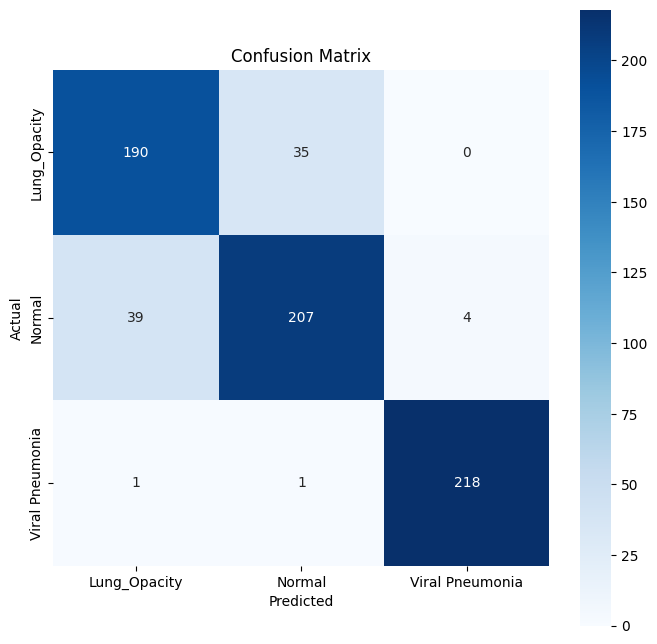

In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)


true_classes = test.classes


conf_matrix = confusion_matrix(true_classes, y_pred_classes)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()